## Import Libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


## Load the dataset

In [58]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploring the data

In [59]:
df.shape

(25, 2)

In [60]:
total_t=df.isnull().sum().sort_values(ascending=False)
per_t=(df.isnull().sum()*100/len(df)).sort_values(ascending=False)
missing=pd.concat([total_t,per_t],axis=1,keys=["Total","Percentage"])
missing

,Total,Percentage
Scores,0,0.0
Hours,0,0.0


In [61]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## EDA

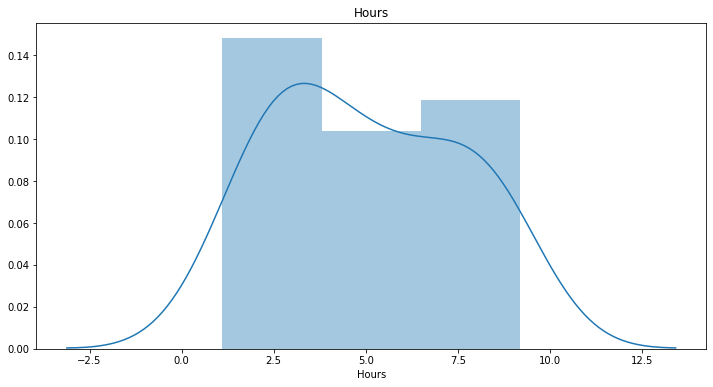

In [62]:
plt.figure(figsize=(12,6))
sns.distplot(df["Hours"])
plt.title("Hours")
plt.show()

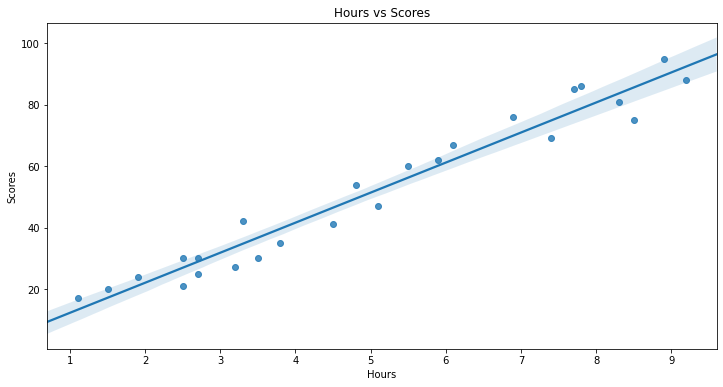

In [63]:
plt.figure(figsize=(12,6))
sns.regplot(df["Hours"],df["Scores"])
plt.title("Hours vs Scores")
plt.show()

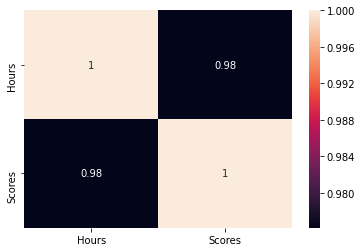

In [64]:
sns.heatmap(df.corr(),annot=True)
plt.show()

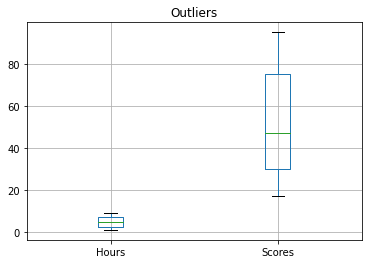

In [65]:
df.boxplot()
plt.title("Outliers")
plt.show()

## Model Building 

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [67]:
X=df.drop(["Scores"],axis=1)
y=df["Scores"]

In [68]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
print("shape of x_train is:",x_train.shape,"shape of x_test is:",x_test.shape)
print("shape of y_train is:",y_train.shape,"shape of y_test is:",y_test.shape)

shape of x_train is: (20, 1) shape of x_test is: (5, 1)
shape of y_train is: (20,) shape of y_test is: (5,)


## Random Forest Regressor

In [69]:
tree=RandomForestRegressor()
tree.fit(x_train,y_train)

print("Training score:",tree.score(x_train,y_train))
print("Test score:",tree.score(x_test,y_test))

Training score: 0.982721502366308
Test score: 0.98047869882544


In [70]:
from sklearn.metrics import mean_squared_error,r2_score

tree_pred=tree.predict(x_test)

tree_accuracy=round(r2_score(y_test,tree_pred)*100,2)
tree_rmse=round(np.sqrt(mean_squared_error(y_test,tree_pred)),2)

In [71]:
print("Accuracy is :",tree_accuracy)
print("Rmse is :",tree_rmse)

Accuracy is : 98.05
Rmse is : 3.39


In [72]:
model=pd.DataFrame()
model=model.append({"Model":"Random forest","R2 Score":tree_accuracy,"RMSE":tree_rmse},ignore_index=True)

## Linear Regression

In [73]:
lr=LinearRegression()
lr.fit(x_train,y_train)

print("Training score:",lr.score(x_train,y_train))
print("Test score:",lr.score(x_test,y_test))

Training score: 0.9491209376364416
Test score: 0.9678055545167994


In [74]:
lr_pred=lr.predict(x_test)

lr_accuracy=round(r2_score(y_test,lr_pred)*100,2)
lr_rmse=round(np.sqrt(mean_squared_error(y_test,lr_pred)),2)

In [75]:
print("Accuracy is :",lr_accuracy)
print("Rmse is :",lr_rmse)

Accuracy is : 96.78
Rmse is : 4.35


In [76]:
model=model.append({"Model":"Linear Regression","R2 Score":lr_accuracy,"RMSE":lr_rmse},ignore_index=True)

In [77]:
model.sort_values(by="R2 Score",ascending=False)

,Model,R2 Score,RMSE
0,Random forest,98.05,3.39
1,Linear Regression,96.78,4.35


## Inference:
-After compairing both models it can be seen that Random Forest gives the best accuracy score and lease RMSE value which means it can be used for prediction.